<a href="https://colab.research.google.com/github/Cokes86/Python-Data-Analysis/blob/main/08%EC%9E%A5_%EC%8B%AC%EC%B8%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#BinaryCrossentropy
import tensorflow as tf
import numpy as np

y_true = np.array([[1],[0],[0],[1]])
y_pred = np.array([[0.8],[0.3],[0.5],[0.9]])
bce = tf.keras.losses.BinaryCrossentropy()
bce(y_true, y_pred).numpy()

0.34458154

In [ ]:
#CategoricalCrossentropy

y_true = np.array([[0.0,1.0,0.0],[0.0,0.0,1.0],[1.0,0.0,0.0]])
y_pred = np.array([[0.6,0.3,0.1],[0.3,0.6,0.1],[0.1,0.7,0.2]])
cce = tf.keras.losses.CategoricalCrossentropy()
cce(y_true, y_pred).numpy()

1.936381

In [ ]:
#SparseCategoricalCrossentropy

y_true = np.array([1,2,0])
y_pred = np.array([[0.6,0.3,0.1],[0.3,0.6,0.1],[0.1,0.7,0.2]])
scce = tf.keras.losses.SparseCategoricalCrossentropy()
scce(y_true, y_pred).numpy()

1.936381

In [ ]:
#정수 인코더
X = np.array([
    ['Korea', 44, 7200],
    ['Japan', 27, 4800],
    ['China', 30, 6100]
])

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X[:,0] = label_encoder.fit_transform(X[:,0])
print(X)

[['2' '44' '7200']
 ['1' '27' '4800']
 ['0' '30' '6100']]


In [ ]:
#원핫 인코더
X = np.array([
    ['Korea', 44, 7200],
    ['Japan', 27, 4800],
    ['China', 30, 6100]
])

from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()
XX = onehot_encoder.fit_transform(X[:,0].reshape(-1,1)).toarray()
print(XX)

X = np.concatenate([XX, X[:,1:]], axis=1)
print(X)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
[['0.0' '0.0' '1.0' '44' '7200']
 ['0.0' '1.0' '0.0' '27' '4800']
 ['1.0' '0.0' '0.0' '30' '6100']]


In [ ]:
#응 사실 케라스에도 있어.
class_vector = [2,6,6,1]

from tensorflow.keras.utils import to_categorical
print(to_categorical(class_vector, num_classes=7))

[[0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
data = [[-1,2],[-0.5,6],[0,10],[1,18]]
scaler = MinMaxScaler()
print(scaler.fit_transform(data))

[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]


In [ ]:
from tensorflow.keras.layers import Normalization
import numpy as np

adapt_data = np.array([[1.],[2.],[3.],[4.],[5.]])
input_data = np.array([[1.],[2.],[3.]])
layer = Normalization()
layer.adapt(adapt_data)
normalized_data = layer(input_data)
print(normalized_data)

tf.Tensor(
[[-1.4142135 ]
 [-0.70710677]
 [ 0.        ]], shape=(3, 1), dtype=float32)


Epoch 1/20
49/49 - 2s - 46ms/step - accuracy: 0.7200 - loss: 0.5751 - val_accuracy: 0.8160 - val_loss: 0.4397
Epoch 2/20
49/49 - 0s - 7ms/step - accuracy: 0.8449 - loss: 0.3734 - val_accuracy: 0.8517 - val_loss: 0.3510
Epoch 3/20
49/49 - 1s - 14ms/step - accuracy: 0.8664 - loss: 0.3235 - val_accuracy: 0.8604 - val_loss: 0.3314
Epoch 4/20
49/49 - 1s - 12ms/step - accuracy: 0.8722 - loss: 0.3088 - val_accuracy: 0.8587 - val_loss: 0.3302
Epoch 5/20
49/49 - 1s - 12ms/step - accuracy: 0.8738 - loss: 0.3043 - val_accuracy: 0.8595 - val_loss: 0.3276
Epoch 6/20
49/49 - 1s - 17ms/step - accuracy: 0.8743 - loss: 0.3002 - val_accuracy: 0.8602 - val_loss: 0.3274
Epoch 7/20
49/49 - 0s - 9ms/step - accuracy: 0.8774 - loss: 0.2961 - val_accuracy: 0.8594 - val_loss: 0.3290
Epoch 8/20
49/49 - 1s - 13ms/step - accuracy: 0.8767 - loss: 0.2955 - val_accuracy: 0.8596 - val_loss: 0.3283
Epoch 9/20
49/49 - 0s - 9ms/step - accuracy: 0.8806 - loss: 0.2904 - val_accuracy: 0.8592 - val_loss: 0.3277
Epoch 10/20
4

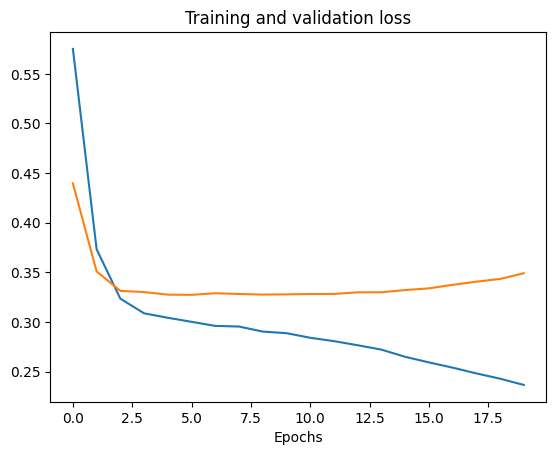

In [ ]:
#과잉적합 우와아앙?!
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words=1000)

def one_hot_sequences(sequences, dimension=1000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

train_data = one_hot_sequences(train_data)
test_data = one_hot_sequences(test_data)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose = 2)

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.show()

Epoch 1/20
49/49 - 5s - 106ms/step - accuracy: 0.7117 - loss: 0.6207 - val_accuracy: 0.8202 - val_loss: 0.4818
Epoch 2/20
49/49 - 1s - 15ms/step - accuracy: 0.8440 - loss: 0.4185 - val_accuracy: 0.8532 - val_loss: 0.3872
Epoch 3/20
49/49 - 1s - 13ms/step - accuracy: 0.8667 - loss: 0.3634 - val_accuracy: 0.8590 - val_loss: 0.3691
Epoch 4/20
49/49 - 0s - 9ms/step - accuracy: 0.8714 - loss: 0.3477 - val_accuracy: 0.8598 - val_loss: 0.3635
Epoch 5/20
49/49 - 0s - 8ms/step - accuracy: 0.8757 - loss: 0.3391 - val_accuracy: 0.8596 - val_loss: 0.3613
Epoch 6/20
49/49 - 1s - 13ms/step - accuracy: 0.8743 - loss: 0.3366 - val_accuracy: 0.8600 - val_loss: 0.3595
Epoch 7/20
49/49 - 0s - 9ms/step - accuracy: 0.8764 - loss: 0.3329 - val_accuracy: 0.8574 - val_loss: 0.3672
Epoch 8/20
49/49 - 1s - 12ms/step - accuracy: 0.8774 - loss: 0.3309 - val_accuracy: 0.8593 - val_loss: 0.3580
Epoch 9/20
49/49 - 1s - 12ms/step - accuracy: 0.8774 - loss: 0.3275 - val_accuracy: 0.8596 - val_loss: 0.3590
Epoch 10/20


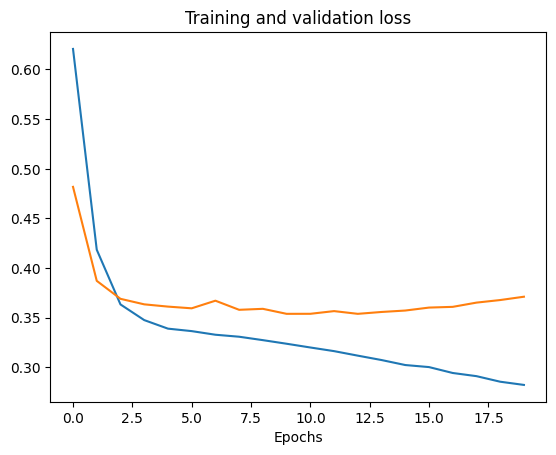

In [ ]:
#과잉적합 해소방법1: 규제항 만들기
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'),
    tf.keras.layers.Dense(16, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose = 2)

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.show()

Epoch 1/20
49/49 - 3s - 62ms/step - accuracy: 0.5462 - loss: 0.6866 - val_accuracy: 0.6958 - val_loss: 0.6517
Epoch 2/20
49/49 - 1s - 18ms/step - accuracy: 0.6614 - loss: 0.6148 - val_accuracy: 0.8120 - val_loss: 0.4947
Epoch 3/20
49/49 - 1s - 12ms/step - accuracy: 0.7629 - loss: 0.5122 - val_accuracy: 0.8417 - val_loss: 0.4009
Epoch 4/20
49/49 - 1s - 18ms/step - accuracy: 0.8084 - loss: 0.4446 - val_accuracy: 0.8517 - val_loss: 0.3596
Epoch 5/20
49/49 - 1s - 27ms/step - accuracy: 0.8321 - loss: 0.4100 - val_accuracy: 0.8557 - val_loss: 0.3399
Epoch 6/20
49/49 - 1s - 15ms/step - accuracy: 0.8452 - loss: 0.3847 - val_accuracy: 0.8573 - val_loss: 0.3363
Epoch 7/20
49/49 - 0s - 9ms/step - accuracy: 0.8495 - loss: 0.3705 - val_accuracy: 0.8591 - val_loss: 0.3262
Epoch 8/20
49/49 - 1s - 12ms/step - accuracy: 0.8568 - loss: 0.3624 - val_accuracy: 0.8595 - val_loss: 0.3264
Epoch 9/20
49/49 - 1s - 13ms/step - accuracy: 0.8640 - loss: 0.3456 - val_accuracy: 0.8604 - val_loss: 0.3251
Epoch 10/20

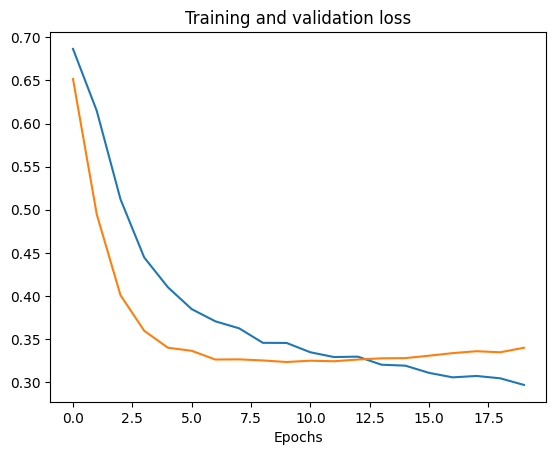

In [ ]:
#드롭아웃
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose = 2)

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.show()

In [ ]:
train_data.shape

(25000, 1000)

In [ ]:
#와 MNIST!
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()
train_data, test_data = train_data / 255.0, test_data / 255.0

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_data, train_labels, epochs=5)
model.evaluate(test_data, test_labels)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8952 - loss: 0.3549
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9706 - loss: 0.0991
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9785 - loss: 0.0687
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9849 - loss: 0.0502
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9867 - loss: 0.0425
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9772 - loss: 0.0780


[0.06372509151697159, 0.9817000031471252]

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7558 - loss: 0.6764
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8536 - loss: 0.4081
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8633 - loss: 0.3793
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8715 - loss: 0.3501
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8774 - loss: 0.3320
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8728 - loss: 0.3450
accuracy: 0.8741999864578247


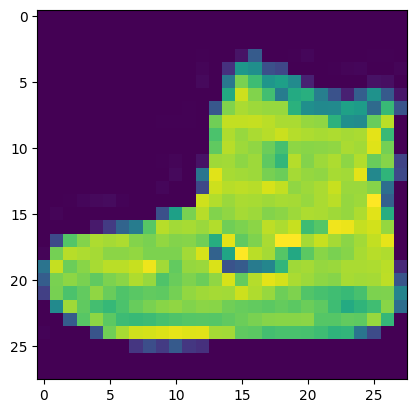

In [ ]:
#패션 아이템 분류
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

fashion_mnist = datasets.fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

plt.imshow(train_data[0])

train_data, test_data = train_data / 255.0, test_data / 255.0
model = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_data, train_labels, epochs=5)
loss, acc = model.evaluate(test_data, test_labels)
print("accuracy:",acc)

#타이타닉

In [ ]:
#타이타닉 생존자 예측
import numpy as np
import pandas as pd
import tensorflow as tf

# 데이터 세트를 읽어들인다.
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/학업/2024-2 파이썬자료분석/titanic_train.csv", sep=',')
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/학업/2024-2 파이썬자료분석/titanic_test.csv", sep=',')

In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# 필요없는 컬럼을 삭제한다.
train.drop(['SibSp', 'Parch', 'Ticket', 'Embarked', 'Name',\
        'Cabin', 'PassengerId', 'Fare', 'Age'], inplace=True, axis=1)

# 결손치가 있는 데이터 행은 삭제한다.
train.dropna(inplace=True)

# 기호를 수치로 변환한다.
for ix in train.index:
    if train.loc[ix, 'Sex']=="male":
       train.loc[ix, 'Sex']=1
    else:
       train.loc[ix, 'Sex']=0

In [ ]:
df = train.groupby('Sex').mean()["Survived"]
df.plot(kind='bar')
plt.show()

In [ ]:
# 2차원 배열을 1차원 배열로 평탄화한다.
target = np.ravel(train.Survived)

# 생존여부를 학습 데이터에서 삭제한다.
train.drop(['Survived'], inplace=True, axis=1)
train = train.astype(float)     # 최근 소스에서는 float형태로 형변환하여야

# 케라스 모델을 생성한다.
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(2,)))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# 케라스 모델을 컴파일한다.
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# 케라스 모델을 학습시킨다.
model.fit(train, target, epochs=30, batch_size=1, verbose=1)